# DATA 690 - Project
###                 -Shailesh Gogineni

### Source : https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015

# Hypothesis :
## 1. Which age group are facing deaths at most?
## 2. Which gender group facing more deaths?
## 3. WHich drug is reason for more deaths?

### Importing required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10
import numpy as np

## Loading CSV file as a dataframe

In [2]:
df=pd.read_csv("Accidental_Drug_Related_Deaths_2012-2018.csv")

## Exploring Data

In [3]:
print( "Number of rows:",df.shape[0],"\n","Number of columns:",df.shape[1])

Number of rows: 5105 
 Number of columns: 41


In [4]:
df.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


## Transposing dataframe for clear view of available columns

In [5]:
df.head().T

,0,1,2,3,4
ID,14-0273,13-0102,16-0165,16-0208,13-0052
Date,06/28/2014 12:00:00 AM,03/21/2013 12:00:00 AM,03/13/2016 12:00:00 AM,03/31/2016 12:00:00 AM,02/13/2013 12:00:00 AM
DateType,DateReported,DateofDeath,DateofDeath,DateofDeath,DateofDeath
Age,NaN,48,30,23,22
Sex,NaN,Male,Female,Male,Male
Race,NaN,Black,White,White,"Asian, Other"
ResidenceCity,NaN,NORWALK,SANDY HOOK,RYE,FLUSHING
ResidenceCounty,NaN,NaN,FAIRFIELD,WESTCHESTER,QUEENS
ResidenceState,NaN,NaN,CT,NY,NaN
DeathCity,NaN,NORWALK,DANBURY,GREENWICH,GREENWICH


# Droping unwanted columns

In [6]:
df=df.drop(["ResidenceCityGeo","InjuryCityGeo","DeathCityGeo","OtherSignifican","OpiateNOS","AnyOpioid","Other"],axis=1)

## After droping columns

In [7]:
df.shape

(5105, 34)

## List of columns

In [8]:
df.columns

Index(['ID', 'Date', 'DateType', 'Age', 'Sex', 'Race', 'ResidenceCity',
       'ResidenceCounty', 'ResidenceState', 'DeathCity', 'DeathCounty',
       'Location', 'LocationifOther', 'DescriptionofInjury', 'InjuryPlace',
       'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD', 'Heroin', 'Cocaine',
       'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad',
       'Morphine_NotHeroin', 'Hydromorphone', 'MannerofDeath'],
      dtype='object')

# Different kinds of drugs are alligned as column names
## For further usage of those drug names they are extracted as below in to a list

In [9]:
list_drugs=list(df.columns[19:33])

In [10]:
print(list_drugs)

['Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone']


In [11]:
dropdf=df

# Every column contains at least a NULL Value
## So droping NULL values individually for each column where neccesaary

In [12]:
dropdf.dropna()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,MannerofDeath


# Updating dataframe without null values in Age column

In [13]:
df = df[df['Age'].notna()]

In [14]:
df.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,MannerofDeath
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident
5,14-0277,06/29/2014 12:00:00 AM,DateofDeath,23.0,Male,White,BRISTOL,NaN,NaN,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident


# Plot Showing Deaths of people from different age groups

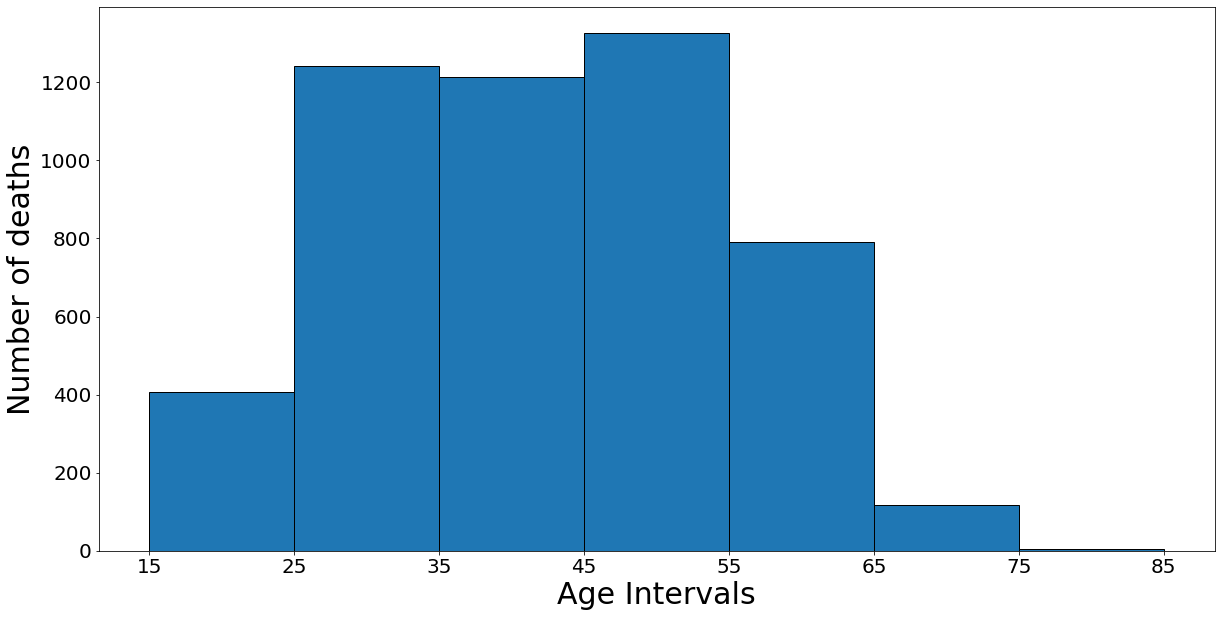

In [15]:
plt.figure(figsize=(20,10))
bins= [15,25,35,45,55,65,75,85]
plt.hist(df.Age, bins=bins, edgecolor="k")
plt.xticks(bins,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Age Intervals",fontsize=30)
plt.ylabel("Number of deaths",fontsize=30)
my_colors = 'rgbkymc'
plt.show()

## Observation: 
### People between age 45-55 are facing lot of deaths due to drugs

In [16]:
df.head(1)

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,MannerofDeath
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident


# Plot comparing deaths between Male and Female

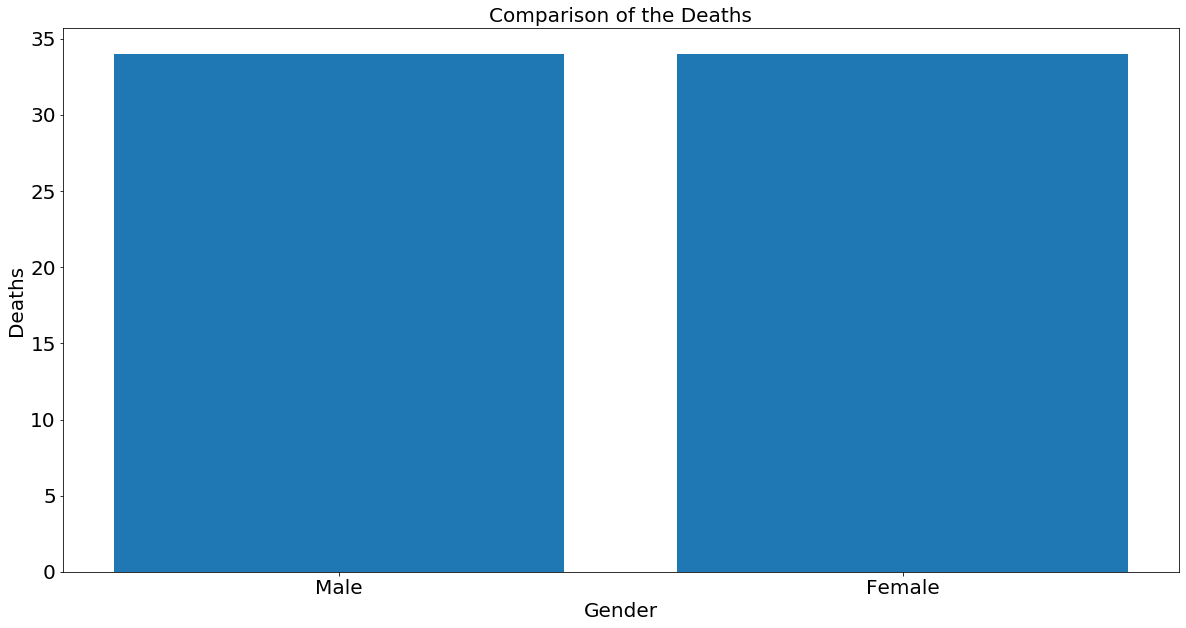

In [17]:
male=len(list(df[df["Sex"]=='Male']))
female=len(list(df[df["Sex"]=='Female']))
dff=pd.DataFrame({"Gender":["Male","Female"],"Deaths":[male,female]})
plt.figure(figsize=(20,10))
plt.bar(dff["Gender"],dff["Deaths"])
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Deaths',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Comparison of the Deaths',fontsize=20)
plt.show()

## Observation: There is no much difference in deaths of male and female